In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
%matplotlib inline

In [12]:
cd "C:\Users\Natalia\Desktop\udata school\machine_learning\exam"

C:\Users\Natalia\Desktop\udata school\machine_learning\exam


## 1. Аналіз датасету

In [54]:
df_train = pd.read_csv('train.csv', header=None)

In [55]:
df_train.head()

,0,1,2,3,4,5,6,7,8
0,M,3.1110,2.4990,0.8160,5.8446,3.044700,NaN,1.992463,8
1,M,2.3715,1.8360,0.5355,2.1981,1.222069,0.545700,NaN,9
2,M,2.4990,2.0145,0.7140,2.7999,1.129650,0.650250,0.765000,11
3,M,3.2130,2.5245,0.8160,5.5743,2.534700,1.127100,1.606500,12
4,M,2.9325,2.2185,0.6885,5.0592,2.203200,1.254302,NaN,10


In [56]:
df_train.shape

(10579, 9)

In [57]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10579 entries, 0 to 10578
Data columns (total 9 columns):
0    10579 non-null object
1    10047 non-null float64
2    10051 non-null float64
3    10044 non-null float64
4    10055 non-null float64
5    10053 non-null float64
6    10073 non-null float64
7    10019 non-null float64
8    10579 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 743.9+ KB


In [58]:
for index, raw in df_train.iterrows():
    df_train[[1,2,3]] = df_train[[1,2,3]].fillna(df_train[[1,2,3]][(df_train[0]==raw[0])&(df_train[8]==raw[8])].mean())

In [59]:
for index, raw in df_train.iterrows():
    df_train[[4,5,6,7]] = df_train[[4,5,6,7]].fillna(df_train[[4,5,6,7]][(df_train[0]==raw[0])&(df_train[8]==raw[8])].mean())

In [60]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10579 entries, 0 to 10578
Data columns (total 9 columns):
0    10579 non-null object
1    10579 non-null float64
2    10579 non-null float64
3    10579 non-null float64
4    10579 non-null float64
5    10579 non-null float64
6    10579 non-null float64
7    10579 non-null float64
8    10579 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 743.9+ KB


In [61]:
df_train.describe()

,1,2,3,4,5,6,7,8
count,10579.000000,10579.000000,10579.000000,10579.000000,10579.000000,10579.000000,10579.000000,10579.000000
mean,2.794600,2.188059,0.764754,4.445237,1.996727,1.001358,1.284855,9.701200
std,0.515379,0.433024,0.229381,2.277447,1.080055,0.532304,0.625988,1.901391
min,1.045500,0.790500,0.000000,0.216750,0.086700,0.028050,0.079050,7.000000
25%,2.448000,1.912500,0.637500,2.706825,1.180650,0.601800,0.826200,8.000000
50%,2.805000,2.193000,0.739500,4.105500,1.831466,0.903664,1.211948,9.000000
75%,3.162000,2.499000,0.867000,5.885400,2.646900,1.331100,1.676625,11.000000
max,4.569913,3.776277,6.007583,14.175450,7.588800,3.876000,4.896377,16.000000


In [62]:
df_train = df_train[(df_train[0]=='M')|(df_train[0]=='F')|(df_train[0]=='I')]

In [65]:
df_train.shape

(10137, 9)

### Розподіл статті тварин


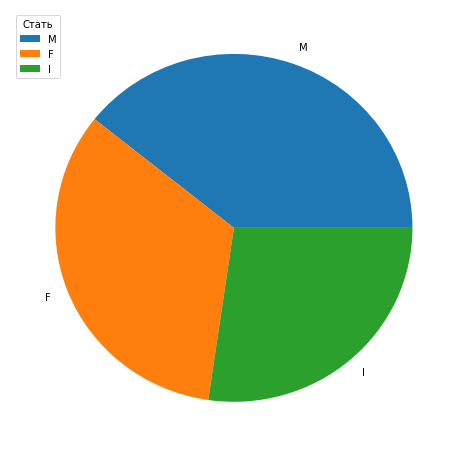

In [63]:
fig, ax = plt.subplots(figsize = (8,8))
patches, texts = ax.pie(df_train[0].value_counts(), labels=list(df_train[0].value_counts().index))
ax.legend(patches, list(df_train[0].value_counts().index),title="Стать")

### Пошук викидів

#### за першим стовпчиком

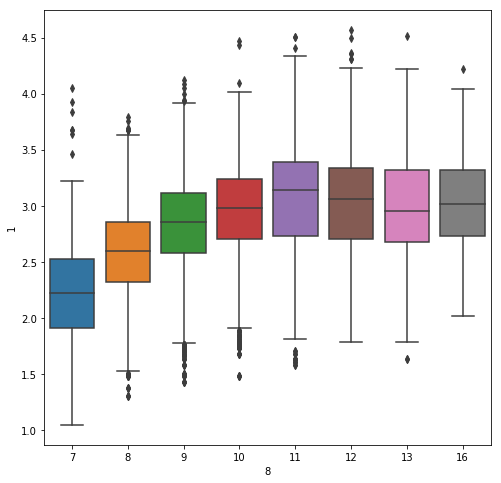

In [72]:
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.boxplot(x=df_train[8], y=df_train[1], data=df_train[[1,8]])


### Якщо подивитися за статтю, то викиди незначні

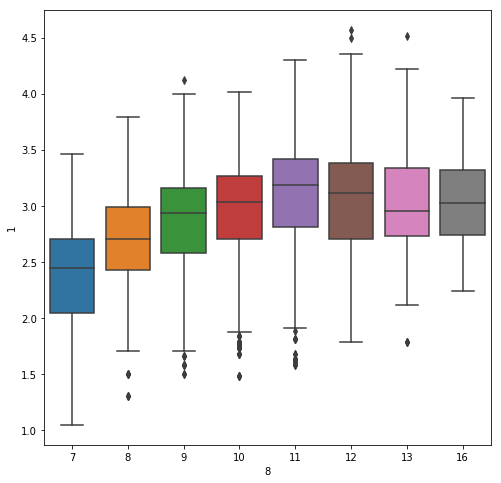

In [74]:
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.boxplot(x=df_train[8][df_train[0]=='M'], y=df_train[1][df_train[0]=='M'], data=df_train[[1,8]][df_train[0]=='M'])

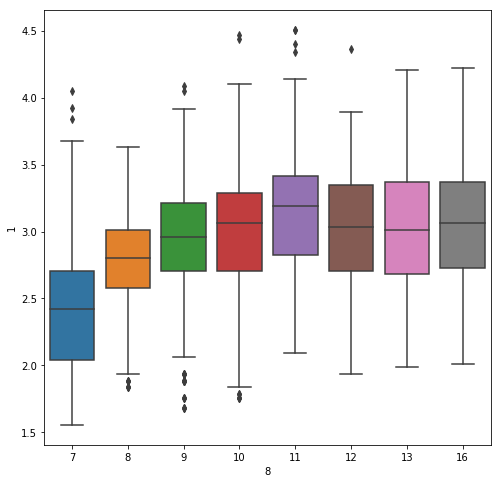

In [75]:
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.boxplot(x=df_train[8][df_train[0]=='F'], y=df_train[1][df_train[0]=='F'], data=df_train[[1,8]][df_train[0]=='F'])

### Збалансованість

In [29]:
df_train[8].value_counts()

9     2213
10    2037
8     1827
11    1543
7     1251
12     841
13     656
16     211
Name: 8, dtype: int64

### Не збалансована 16 виду значно менше ніж 9-го

In [97]:
df_train[0] = df_train[0] .astype('category')

In [98]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10137 entries, 0 to 10578
Data columns (total 9 columns):
0    10137 non-null category
1    10137 non-null float64
2    10137 non-null float64
3    10137 non-null float64
4    10137 non-null float64
5    10137 non-null float64
6    10137 non-null float64
7    10137 non-null float64
8    10137 non-null int64
dtypes: category(1), float64(7), int64(1)
memory usage: 1.0 MB


In [102]:
dfDummies = pd.get_dummies(df_train[0], prefix = 'category')

In [103]:
dfDummies.head(10)

,category_F,category_I,category_M
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
6,0,0,1
7,0,0,1
8,1,0,0
9,0,0,1


In [105]:
df_train = pd.concat([dfDummies, df_train.iloc[:,1:]], axis=1)

In [110]:
df_train.iloc[:,0:-1].head()

,category_F,category_I,category_M,1,2,3,4,5,6,7
0,0,0,1,3.1110,2.4990,0.8160,5.8446,3.044700,0.858893,1.992463
1,0,0,1,2.3715,1.8360,0.5355,2.1981,1.222069,0.545700,1.068265
2,0,0,1,2.4990,2.0145,0.7140,2.7999,1.129650,0.650250,0.765000
3,0,0,1,3.2130,2.5245,0.8160,5.5743,2.534700,1.127100,1.606500
4,0,0,1,2.9325,2.2185,0.6885,5.0592,2.203200,1.254302,1.068265


In [111]:
model1 = LogisticRegression()
model1.fit(df_train.iloc[:,0:-1], df_train[8])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
df_test = pd.read_csv('test.csv', header=None)

In [119]:
for index, raw in df_test.iterrows():
    df_test.iloc[:,1:8] = df_test.iloc[:,1:8].fillna(df_test.iloc[:,1:8][(df_test[0]==raw[0])&(df_test[8]==raw[8])].mean())

In [113]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2645 entries, 0 to 2644
Data columns (total 9 columns):
0    2645 non-null object
1    2512 non-null float64
2    2535 non-null float64
3    2516 non-null float64
4    2525 non-null float64
5    2512 non-null float64
6    2523 non-null float64
7    2518 non-null float64
8    2645 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 186.1+ KB


In [ ]:
ynew = model.predict(Xnew)